# Support Vector Machine
- face recognition
- NLP


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('cancer.csv')
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [19]:
# x = data.drop(['id','diagnosis'],axis=1)
# y = data['diagnosis']
x = data.iloc[:,1:31].values
y = data.iloc[:,31].values
print("cancer dataset dimensions: {}".format(data.shape))
print(data.groupby('diagnosis').size())
print(data.isna().sum())

cancer dataset dimensions: (569, 32)
diagnosis
B    357
M    212
dtype: int64
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis              

diagnosis
B    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
M    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
dtype: object

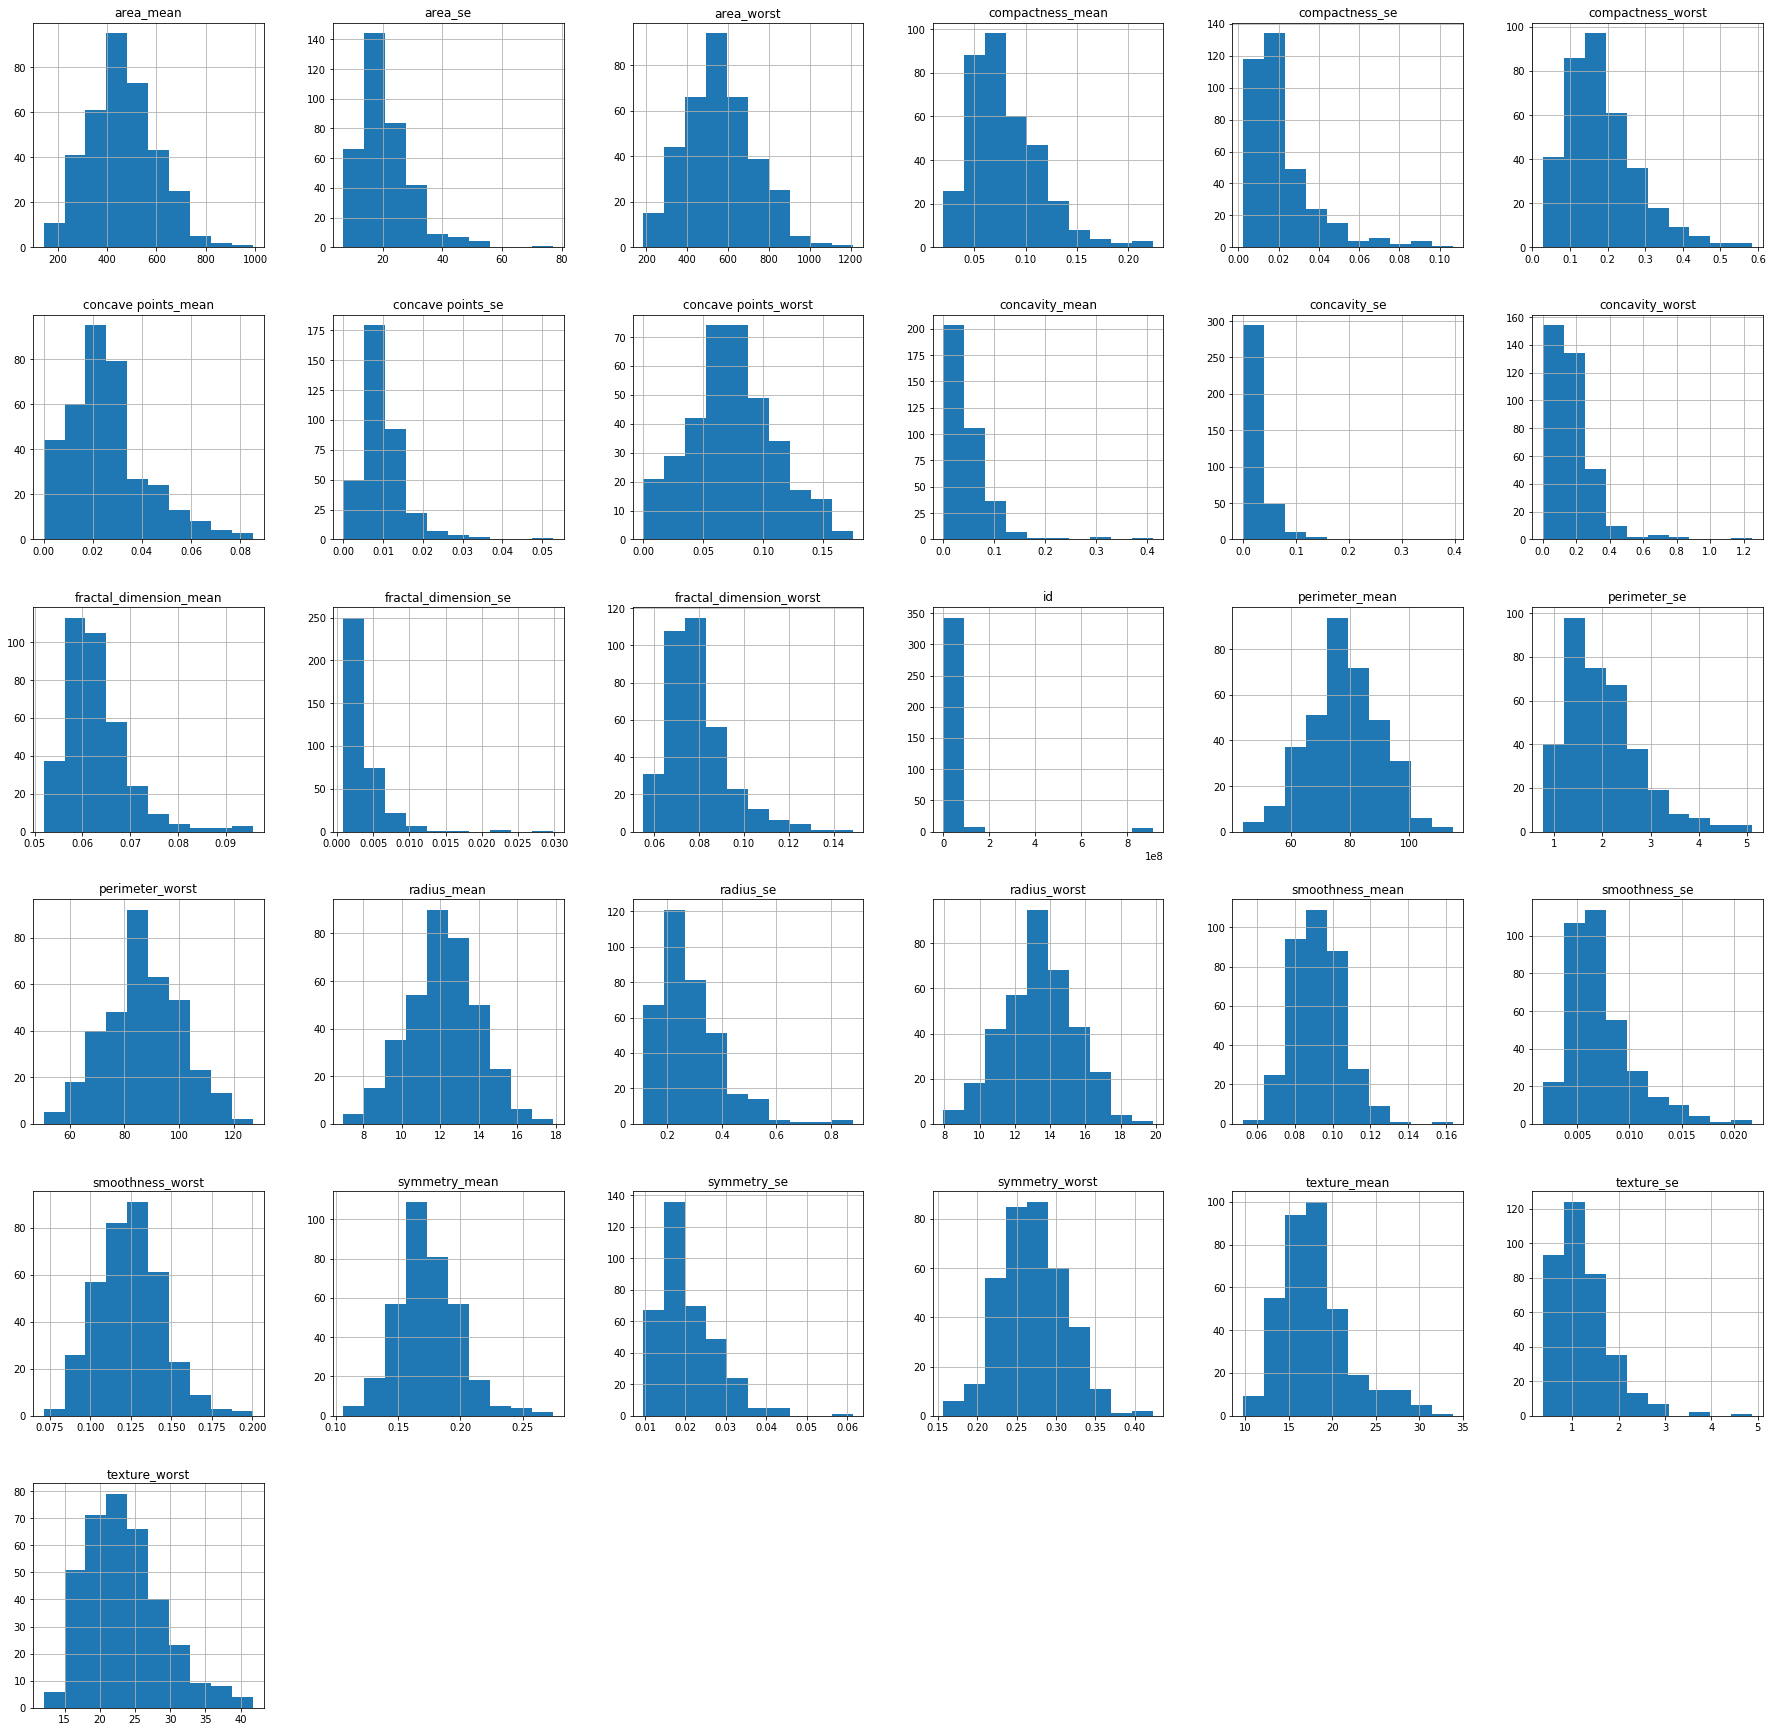

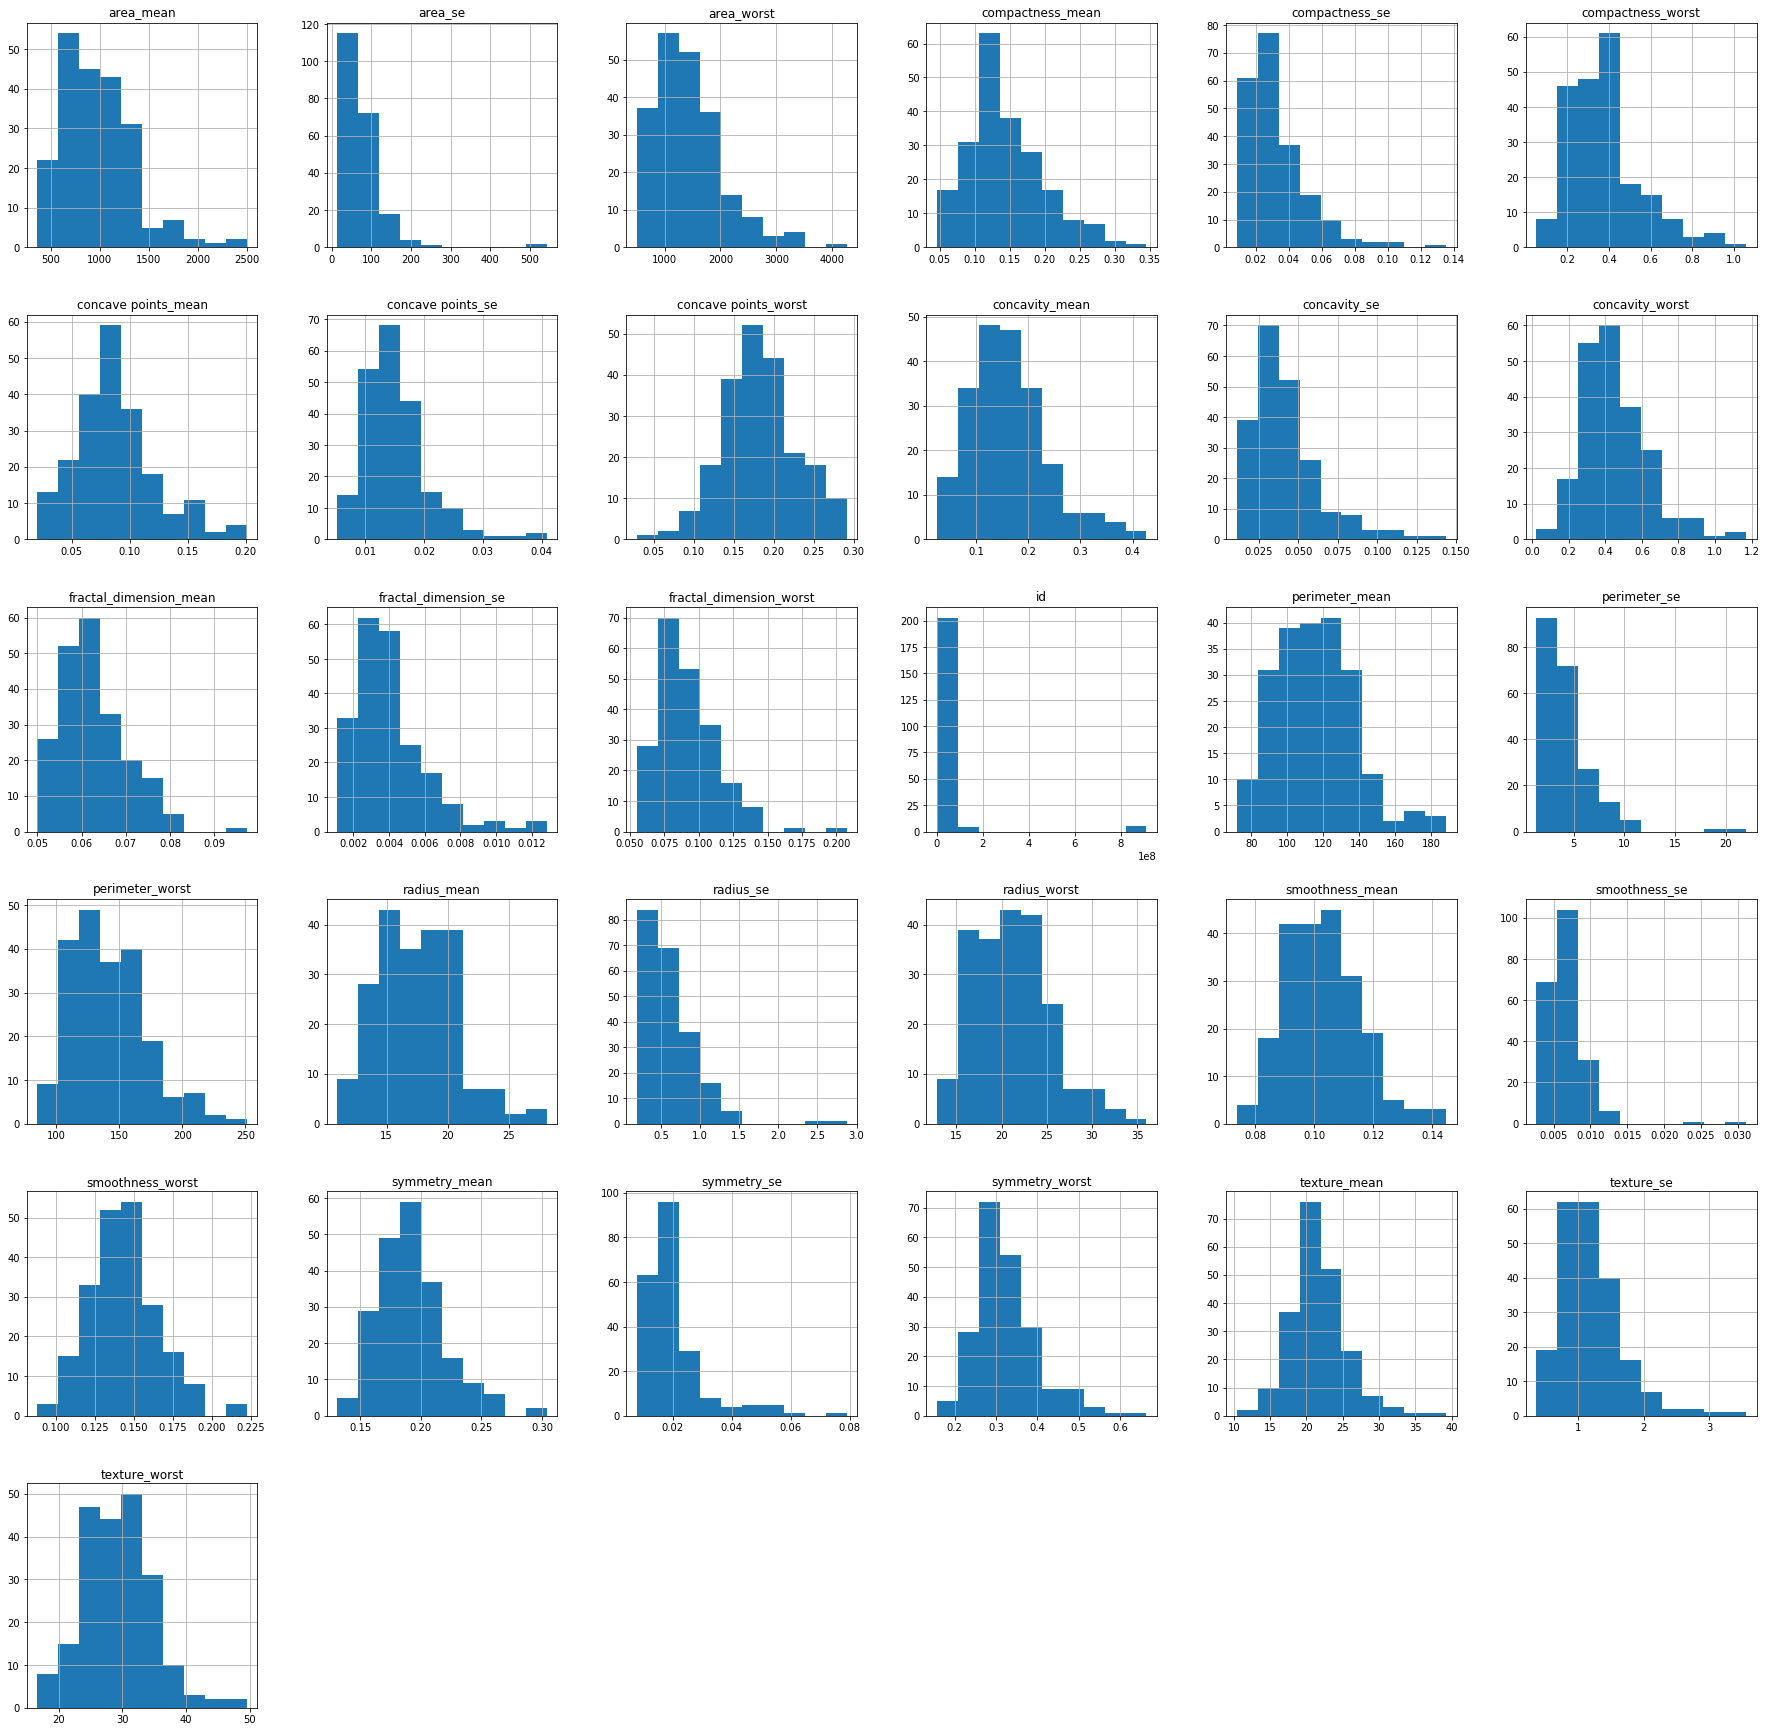

In [28]:
data.groupby('diagnosis').hist(figsize=(31,31))

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y) ## Encodes M - 1 , B - 0
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape,x_test.shape)
x_train

(455, 30) (114, 30)


array([[1.799e+01, 2.066e+01, 1.178e+02, ..., 1.974e-01, 3.060e-01,
        8.503e-02],
       [2.029e+01, 1.434e+01, 1.351e+02, ..., 1.625e-01, 2.364e-01,
        7.678e-02],
       [9.000e+00, 1.440e+01, 5.636e+01, ..., 1.389e-02, 2.991e-01,
        7.804e-02],
       ...,
       [1.720e+01, 2.452e+01, 1.142e+02, ..., 1.899e-01, 3.313e-01,
        1.339e-01],
       [1.403e+01, 2.125e+01, 8.979e+01, ..., 7.963e-02, 2.226e-01,
        7.617e-02],
       [1.303e+01, 1.842e+01, 8.261e+01, ..., 5.013e-02, 1.987e-01,
        6.169e-02]])

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_train

array([[ 1.0449852 ,  0.29708512,  1.01044815, ...,  1.21839781,
         0.29811854,  0.08380738],
       [ 1.68141074, -1.14098169,  1.70338066, ...,  0.69716372,
        -0.88595033, -0.41234747],
       [-1.44260855, -1.12732916, -1.4504636 , ..., -1.52233766,
         0.1807324 , -0.33657109],
       ...,
       [ 0.82638686,  1.17539807,  0.86625411, ...,  1.10638475,
         0.72853438,  3.02284824],
       [-0.05077356,  0.43133503, -0.11146165, ..., -0.54050588,
        -1.1207226 , -0.44903285],
       [-0.32748032, -0.21260945, -0.39904866, ..., -0.98109057,
        -1.52732096, -1.31985978]])

In [49]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', random_state = 0)
print(clf.fit(x_train,y_train))
## kernal can be linear, polynomial ....
y_pred = clf.predict(x_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy: ',accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',cm)

print('Classification Report: \n',classification_report(y_test,y_pred))

Accuracy:  0.9649122807017544
Confusion Matrix:
 [[70  2]
 [ 2 40]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

